In [1]:
# Import Data Libraries
import pandas as pd
import numpy as np

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the data

In [2]:



# Read in the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Drop ID columns
train.drop(columns="Id", axis=1, inplace=True)
test.drop(columns="Id", axis=1, inplace=True)

In [3]:
# Explore the format
print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

# Explore the head of the dataframe
train.head()

Train shape: (1460, 80)
Test shape: (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:

# train.dtypes          # check the datatypes of the columns
# train.columns         # check name of columns
# train.shape           # check the shape of the columns
# train.isna().sum()    # check how much missing data in each column

In [6]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
# Leaked columns
leaked_columns = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition']

# Remove in BOTH datasets
train.drop(labels = leaked_columns, axis = 1, inplace = True)
test.drop(labels = leaked_columns, axis = 1, inplace= True)

# Data Preprocessing 



In [9]:
# Check the data types of the columns
train.dtypes

MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
                ...   
PoolQC          object
Fence           object
MiscFeature     object
MiscVal          int64
SalePrice        int64
Length: 76, dtype: object

### Target column

In [10]:
# Check for missing values in the target column
train["SalePrice"].isna().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


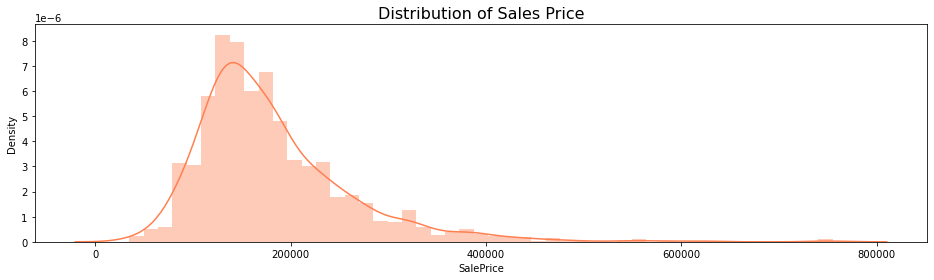

In [11]:
# Plot of the target column
plt.figure(figsize = (16, 4))
sns.distplot(a = train["SalePrice"], color = "#FF7F50")
plt.title("Distribution of Sales Price", fontsize=16);

In [12]:
# Storing the target variable separately
y = train["SalePrice"]
train.drop(columns=["SalePrice"], axis=1, inplace=True)

### #II. Numerical Data

> Numerical columns are the ones that are of type `int` or `float`.

In [13]:
# Select ONLY numerical columns
numerical_cols = [col for col in train.columns if 
                  train[col].dtype in ["int64", "float64"]]

Let's see if there are any missing values between these columns.

In [14]:
# Find the columns that have null values
na_count_n = train[numerical_cols].isna().sum()   # this becomes a Pandas Series
na_count_n[na_count_n > 0]                          # filter

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


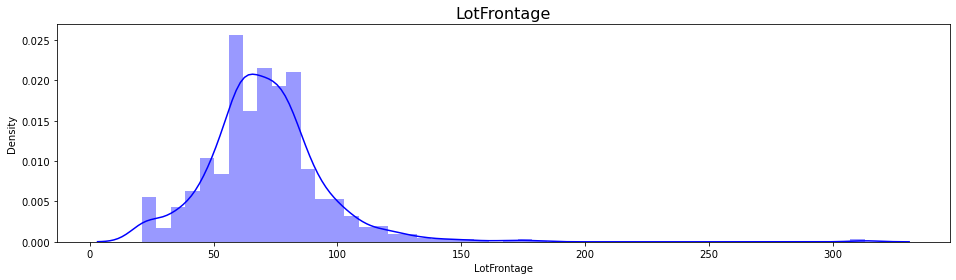

In [15]:
# Select columns with NAs
na_numeric_columns = na_count_n[na_count_n > 0].index
na_numeric_data = train[na_numeric_columns].dropna(axis=0)



plt.figure(figsize = (16, 4))
sns.distplot(a = na_numeric_data[na_numeric_columns[0]], color = "blue")
plt.title(f"{na_numeric_columns[0]}", fontsize=16);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


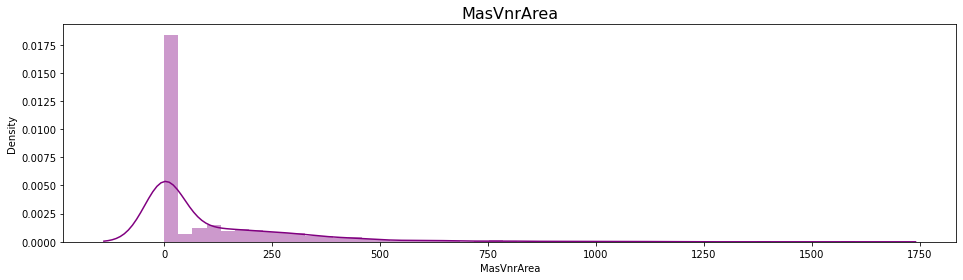

In [16]:
plt.figure(figsize = (16, 4))
sns.distplot(a = na_numeric_data[na_numeric_columns[1]], color = "purple")
plt.title(f"{na_numeric_columns[1]}", fontsize=16);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


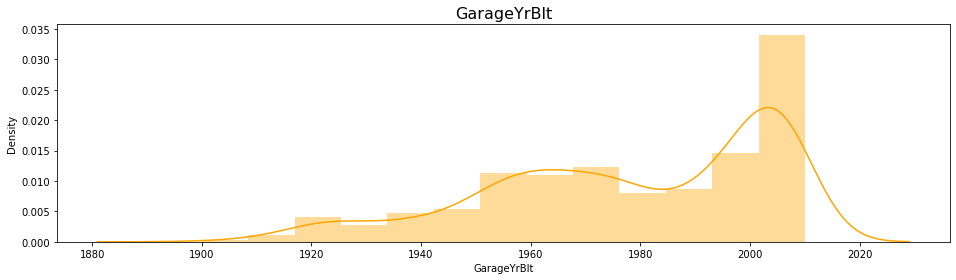

In [17]:
plt.figure(figsize = (16, 4))
sns.distplot(a = na_numeric_data[na_numeric_columns[2]], color = "orange")
plt.title(f"{na_numeric_columns[2]}", fontsize=16);

In [18]:
# Import Simple Imputer and from SkLearn
from sklearn.impute import SimpleImputer

In [19]:
# Prepare the Imputation Objects
median_impute = SimpleImputer(strategy = 'median')
mode_impute = SimpleImputer(strategy = 'most_frequent')
mean_impute = SimpleImputer(strategy = 'mean')

In [20]:
def apply_imputation(impute_object, column):
    '''Function that applies the imputation to the desired column.
    Returns the values for train and test.'''

    
    imputed_train = impute_object.fit_transform(X = train[[column]])
    imputed_test = impute_object.transform(X = test[[column]])
    
    return imputed_train, imputed_test

In [21]:
# Make the Imputation
train['LotFrontage'] = apply_imputation(median_impute, 'LotFrontage')[0]
test['LotFrontage'] = apply_imputation(median_impute, 'LotFrontage')[1]

train['MasVnrArea'] = apply_imputation(mode_impute, 'MasVnrArea')[0]
test['MasVnrArea'] = apply_imputation(mode_impute, 'MasVnrArea')[1]

train['GarageYrBlt'] = apply_imputation(mean_impute, 'GarageYrBlt')[0]
test['GarageYrBlt'] = apply_imputation(mean_impute, 'GarageYrBlt')[1]

In [22]:
# # Import the Standard Scaler
# from sklearn.preprocessing import StandardScaler

# # Scale the data
# scaler = StandardScaler()
# scaled_matrix_train = pd.DataFrame(scaler.fit_transform(train[numerical_cols]),
#                                    columns=numerical_cols)
# scaled_matrix_test = pd.DataFrame(scaler.transform(test[numerical_cols]),
#                                    columns=numerical_cols)

# # Erase old data and append scaled one
# train.drop(columns=numerical_cols, axis=1, inplace=True)
# test.drop(columns=numerical_cols, axis=1, inplace=True)

# train = pd.concat([train, scaled_matrix_train], axis=1)
# test = pd.concat([test, scaled_matrix_test], axis=1)

# Categorical Data

> Categorical data is the one stored in object datatypes.

In [23]:
# Select ONLY categorical columns
categ_cols = [col for col in train.columns if 
              train[col].dtype in ["object"]]

Let's see if there are any missing values between these columns.

In [24]:
# Find the columns that have null values
na_count_s = train[categ_cols].isna().sum()    
na_count_s[na_count_s > 0]                       

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [25]:
# Drop all columns with more than 50% missing data
to_drop = na_count_s[na_count_s > train.shape[0]*0.5].index

train.drop(labels=to_drop, axis=1, inplace=True)
test.drop(labels=to_drop, axis=1, inplace=True)

# Update the categ_cols
categ_cols = list(set(categ_cols) - set(to_drop))

Now all we have to do is **impute** the rest of the data and **encode** it (transform it from data type `object` to data type `int`)

In [26]:
# The computer doesn't know how to read letters :)
train[categ_cols]

,Street,Condition1,RoofStyle,Foundation,LandSlope,Utilities,Condition2,LotShape,ExterQual,KitchenQual,...,PavedDrive,LandContour,ExterCond,BldgType,MasVnrType,FireplaceQu,MSZoning,CentralAir,HouseStyle,GarageCond
0,Pave,Norm,Gable,PConc,Gtl,AllPub,Norm,Reg,Gd,Gd,...,Y,Lvl,TA,1Fam,BrkFace,NaN,RL,Y,2Story,TA
1,Pave,Feedr,Gable,CBlock,Gtl,AllPub,Norm,Reg,TA,TA,...,Y,Lvl,TA,1Fam,None,TA,RL,Y,1Story,TA
2,Pave,Norm,Gable,PConc,Gtl,AllPub,Norm,IR1,Gd,Gd,...,Y,Lvl,TA,1Fam,BrkFace,TA,RL,Y,2Story,TA
3,Pave,Norm,Gable,BrkTil,Gtl,AllPub,Norm,IR1,TA,Gd,...,Y,Lvl,TA,1Fam,None,Gd,RL,Y,2Story,TA
4,Pave,Norm,Gable,PConc,Gtl,AllPub,Norm,IR1,Gd,Gd,...,Y,Lvl,TA,1Fam,BrkFace,TA,RL,Y,2Story,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Norm,Gable,PConc,Gtl,AllPub,Norm,Reg,TA,TA,...,Y,Lvl,TA,1Fam,None,TA,RL,Y,2Story,TA
1456,Pave,Norm,Gable,CBlock,Gtl,AllPub,Norm,Reg,TA,TA,...,Y,Lvl,TA,1Fam,Stone,TA,RL,Y,1Story,TA
1457,Pave,Norm,Gable,Stone,Gtl,AllPub,Norm,Reg,Ex,Gd,...,Y,Lvl,Gd,1Fam,None,Gd,RL,Y,2Story,TA
1458,Pave,Norm,Hip,CBlock,Gtl,AllPub,Norm,Reg,TA,Gd,...,Y,Lvl,TA,1Fam,None,NaN,RL,Y,1Story,TA


In [27]:
# Import OneHotEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [28]:
# Create the imputation object
c_mode_impute = SimpleImputer(strategy = 'most_frequent')
# Create the encoder object
encoder = OneHotEncoder(handle_unknown='ignore')

In [29]:
# Make the Imputation
for column in categ_cols:
    train[column] = apply_imputation(c_mode_impute, column)[0]
    test[column] = apply_imputation(c_mode_impute, column)[1]
    

# Perform One Hot Encoding
encoded_train = pd.DataFrame(encoder.fit_transform(train[categ_cols]).toarray())
encoded_test = pd.DataFrame(encoder.transform(test[categ_cols]).toarray())

# Drop old columns and replace with encoded ones
train.drop(columns=categ_cols, axis=1, inplace=True)
test.drop(columns=categ_cols, axis=1, inplace=True)

train = pd.concat([train, encoded_train], axis=1)
test = pd.concat([test, encoded_test], axis=1)

#  Model Training 


In [30]:
# Data Splitting
from sklearn.model_selection import train_test_split


from xgboost import XGBRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error

# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [31]:
# train -> training data
# test -> testing data (unlabeled)
# y -> target variable (we stored it from the train data)

# Target Variable: y
# Features -> X
X = train

# Split data further
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, 
                                                      random_state = 0)



### XGBoost



In [32]:


xgb_model = XGBRegressor(n_estimators=600)

# Train the model on training data
xgb_model.fit(X=X_train, y=y_train)

# Predict on validation data
predictions = xgb_model.predict(X_valid)

# Get how well it performed
mae_xgb = mean_absolute_error(y_valid, predictions)

print("XGBoost: {:,}".format(mae_xgb))

XGBoost: 18,382.576305650684


# Hyper-Parameters

In [60]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
#Best Values
xgb_model = XGBRegressor()
#dictionaire of parameters to grid search
param_test1 = { 'max_depth' : range(3, 10, 2), 'min_child_weight' : range(1, 6, 2)}

gsearch1 = GridSearchCV(estimator= XGBRegressor(learning_rate =0.1, n_estimators=1000, 
                                                gamma=0, subsample=0.8, colsample_bytree=0.8, 
                                                nthread=4, scale_pos_weight=1, seed=27, objective='reg:squarederror'), 
                        param_grid = param_test1, cv=5)
gsearch1.fit(X_train, y_train)

#outputs
print('Best params:', gsearch1.best_params_)
print('Best estim:', gsearch1.best_estimator_)
print('Best score:', gsearch1.best_score_)

In [ ]:
#Optimum Values
param_test2 = {'max_depth' : [3, 4, 5], 'min_child_weight' : [1]}

gsearch2 = GridSearchCV(estimator= XGBRegressor(learning_rate =0.1, n_estimators=1000, 
                                                gamma=0, subsample=0.8, colsample_bytree=0.8, 
                                                nthread=4, scale_pos_weight=1, seed=27, objective='reg:squarederror'), 
                        param_grid = param_test2, cv=5)
gsearch2.fit(X_train, y_train)

print('Best params:', gsearch2.best_params_)
print('Best estim:', gsearch2.best_estimator_)
print('Best score:', gsearch2.best_score_)

In [ ]:
param_test3 = {'gamma' : [i/10.0 for i in range(0,5)]}
gsearch3 = GridSearchCV(estimator= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, 
                                                colsample_bytree=0.8, gamma=0, importance_type='gain', learning_rate=0.1, 
                                                max_delta_step=0, max_depth=4, min_child_weight=1, missing=None, 
                                                n_estimators=1000, n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0, 
                                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=None, 
                                                subsample=0.8, verbosity=1), 
                        param_grid = param_test3, cv=5)
gsearch3.fit(X_train, y_train)

print('Best params:', gsearch3.best_params_)
print('Best estim:', gsearch3.best_estimator_)
print('Best score:', gsearch3.best_score_)

In [ ]:
# first try
param_test4 = {'subsample' : [i/10.0 for i in range(6,10)], 'colsample_bytree' : [i/10.0 for i in range(6,10)]}
gsearch4 = GridSearchCV(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                     colsample_bynode=1, gamma=0.0,
                                     importance_type='gain', learning_rate=0.1,
                                     max_depth=4, min_child_weight=1, n_estimators=100,
                                     n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
                                     reg_alpha=0, reg_lambda=1, seed=27,
                                   verbosity=1),
                       param_grid = param_test4, cv=5)
gsearch4.fit(X_train, y_train)

print('Best params:', gsearch4.best_params_)
print('Best estim:', gsearch4.best_estimator_)
print('Best score:', gsearch4.best_score_)

# going deeper
param_test5 = {'subsample' : [i/100.0 for i in range(60,80,5)], 'colsample_bytree' : [i/100.0 for i in range(70,90,5)]}
gsearch5 = GridSearchCV(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                     colsample_bynode=1, gamma=0.0,
                                     importance_type='gain', learning_rate=0.1, max_delta_step=0,
                                     max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
                                     n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
                                     reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
                                     silent=None, verbosity=1),
                       param_grid = param_test5, cv=5)
gsearch5.fit(X_train, y_train)

print('Best params:', gsearch4.best_params_)
print('Best estim:', gsearch4.best_estimator_)
print('Best score:', gsearch4.best_score_)

In [ ]:
# first try
param_test6 = {'reg_alpha' : [1e-5, 1e-2, 0.1, 1, 100]}
gsearch6 = GridSearchCV(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
                                     importance_type='gain', learning_rate=0.1, 
                                     max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
                                     n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
                                     reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8, verbosity=1),
                       param_grid = param_test6, cv=5)

gsearch6.fit(x_train, y_train)

print('Best params:', gsearch6.best_params_)
print('Best estim:', gsearch6.best_estimator_)
print('Best score:', gsearch6.best_score_)

# going deeper :)
param_test7 = {'reg_alpha' : [0.9, 1, 1.1]}
gsearch7 = GridSearchCV(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
                                     importance_type='gain', learning_rate=0.1, max_delta_step=0,
                                     max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
                                     n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
                                     reg_lambda=1, scale_pos_weight=1, seed=27,
                                     silent=None, subsample=0.8, verbosity=1),
                       param_grid = param_test7, cv=5)

gsearch7.fit(X_train, y_train)

print('Best params:', gsearch7.best_params_)
print('Best estim:', gsearch7.best_estimator_)
print('Best score:', gsearch7.best_score_)

# Gained Optimum values by the gridsearch

In [39]:

tuned_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
                        importance_type='gain', learning_rate=0.005, 
                        max_delta_step=0, max_depth=4, min_child_weight=1, 
                        missing=1, n_estimators=1000, n_jobs=1, 
                        nthread=4, objective='reg:squarederror', random_state=0,
                        reg_alpha=1, reg_lambda=1,  seed=27,
                         subsample=0.8, verbosity=1)

# Fit on the entire training data
tuned_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=1, monotone_constraints='()', n_estimators=5000, n_jobs=1,
             nthread=4, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=1, ...)

In [51]:
# Predict and Submit
pred = tuned_xgb.predict(X_valid)

In [67]:
result = pd.DataFrame({'Actual':y_valid,
              'Prediction':pred})
              

In [68]:
result

,Actual,Prediction
529,200624,236504.375000
491,133000,144687.906250
459,110000,108453.023438
279,192000,214274.593750
655,88000,88658.070312
...,...,...
271,241500,214266.781250
445,127500,149409.203125
654,350000,360509.187500
1280,227000,214147.390625


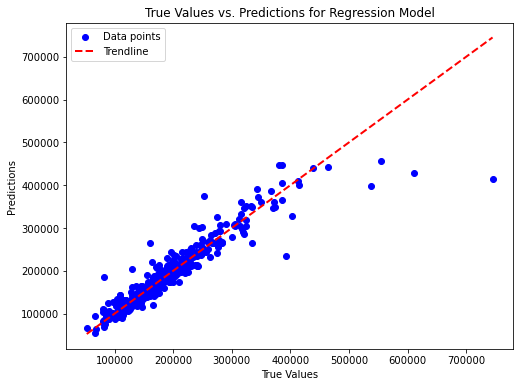

In [71]:

plt.figure(figsize=(8, 6))
plt.scatter(result.Actual, result.Prediction, color='blue', label='Data points')

# Add a trendline (diagonal line)
plt.plot([min(result.Actual), max(result.Actual)], [min(result.Actual), max(result.Actual)], color='red', linestyle='--', linewidth=2, label='Trendline')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions for Regression Model')
plt.legend()

# Display the 